### What is the purpose of grid search cv in machine learning, and how does it work?

Grid search cross-validation (GridSearchCV) is a technique used in machine learning to find the best combination of hyperparameters for a given model. Hyperparameters are parameters that are not learned from the data but are set prior to training and can significantly impact the performance of a machine learning algorithm. Examples of hyperparameters include learning rate, regularization strength, kernel type in support vector machines, and the number of hidden layers and neurons in a neural network.

The purpose of GridSearchCV is to systematically search through a predefined set of hyperparameter values and combinations to identify the combination that results in the best model performance, as measured by a specified evaluation metric (e.g., accuracy, F1 score, mean squared error, etc.).

Here's how GridSearchCV works:

1. **Hyperparameter Space Definition:** First, we define a grid of hyperparameters and their possible values that we want to explore. This grid is essentially a list of hyperparameters and the possible values we want to consider for each. For example:

   param_grid = {
       'C': [0.1, 1, 10],
       'kernel': ['linear', 'rbf', 'poly'],
       'gamma': [0.001, 0.01, 0.1]
   }

   In this example, we're exploring different values of the `C`, `kernel`, and `gamma` hyperparameters for a Support Vector Machine (SVM).

2. **Model Selection and Cross-Validation:** GridSearchCV uses cross-validation to evaluate each combination of hyperparameters. It divides the dataset into multiple subsets (folds), trains the model on a combination of hyperparameters on one subset, and evaluates the model's performance on another. This process is repeated for each combination of hyperparameters and for each fold. Typically, a k-fold cross-validation is used, where the dataset is divided into k subsets, and the process is repeated k times with a different fold as the validation set each time.

3. **Performance Metric:** We specify a performance metric that GridSearchCV uses to evaluate the models on each fold. Common metrics include accuracy, precision, recall, F1-score, mean squared error, etc. The choice of metric depends on the nature of our problem (classification, regression, etc.).

4. **Best Hyperparameter Selection:** After evaluating all combinations of hyperparameters, GridSearchCV selects the combination that results in the best performance based on the chosen metric. This combination is considered the optimal set of hyperparameters for our model.

5. **Model Training with Best Hyperparameters:** Finally, we can train our model with the selected best hyperparameters on the entire dataset. This is often done to create the final model that will be used for making predictions on new, unseen data.

Grid search can be computationally expensive, especially when we have a large number of hyperparameters and a large dataset. However, it is a systematic and reliable method for hyperparameter tuning, helping us find the best set of hyperparameters to optimize our machine learning model's performance.

### Describe the difference between grid search cv and randomize search cv, and when might you choose one over the other?

Here are the main differences between the two and when we might choose one over the other:

1. **Search Strategy:**

   - **Grid Search CV:** Grid Search performs an exhaustive search over all possible combinations of hyperparameters within a predefined grid. It means it tries every possible combination of hyperparameters. While this is thorough, it can be computationally expensive, especially when dealing with a large number of hyperparameters and their possible values.

   - **Randomized Search CV:** Randomized Search, on the other hand, does not search exhaustively. Instead, it randomly samples a specified number of combinations from the hyperparameter space. This random sampling can be more efficient in terms of computational resources.

2. **Exploration of the Hyperparameter Space:**

   - **Grid Search CV:** Grid search explores the entire specified hyperparameter space systematically. This can be advantageous when we have a reasonable understanding of which hyperparameters are likely to be important and their potential values. It ensures that no combination is left untested, which can be crucial when the optimal hyperparameters are near the edges of the search space.

   - **Randomized Search CV:** Randomized search explores a random subset of the hyperparameter space. It might not guarantee that every possible combination is tested, but it has a higher likelihood of finding good hyperparameters more quickly, especially when the search space is vast and many combinations are unlikely to yield significant improvements.

3. **Resource Considerations:**

   - **Grid Search CV:** Grid search can be very resource-intensive, especially if you have a large number of hyperparameters with many possible values. It may not be practical for extensive hyperparameter spaces.

   - **Randomized Search CV:** Randomized search is more efficient in terms of computational resources because it samples a limited number of combinations. It's a good choice when we have limited computational power or when we want to get reasonably good results quickly.

4. **Best Use Cases:**

   - **Grid Search CV:** Use grid search when we have a relatively small search space and we want to ensure a thorough exploration of hyperparameters. It's suitable when we have prior knowledge about the hyperparameters and their ranges, and we want to find the absolute best combination.

   - **Randomized Search CV:** Use randomized search when we have a large search space, limited computational resources, or when we're uncertain about which hyperparameters are most important. It's a more practical choice for high-dimensional hyperparameter tuning.

### What is data leakage, and why is it a problem in machine learning? Provide an example.

Data leakage, also known as leakage or data snooping, refers to a situation in machine learning where information from outside the training dataset is used to make predictions or decisions during the training process. Data leakage can lead to overly optimistic model evaluations and unreliable performance estimates, which can be a significant problem in machine learning for several reasons:

1. **Overestimation of Model Performance:** Data leakage can make a model appear to perform better than it actually would on unseen data. This is because the model has learned patterns or information that won't be available in real-world scenarios.

2. **Invalid Generalization:** Machine learning models are designed to generalize from training data to unseen data. Data leakage undermines this generalization because the model has learned to rely on specific information that is not representative of the true underlying patterns in the data.

3. **Bias:** Data leakage can introduce bias into the model. For example, if a model learns information related to a specific time period that is not relevant to future data, it may make biased predictions.

4. **Loss of Trust:** Models developed with data leakage can lead to poor real-world performance and a loss of trust in the model's predictions. This can have serious consequences, especially in critical applications like healthcare or finance.

Here's an example to illustrate data leakage:

**Example: Credit Card Fraud Detection**

Suppose we are building a machine learning model to detect credit card fraud. We have a dataset with transaction records, including features like transaction amount, merchant ID, time of day, and whether the transaction was fraudulent (target variable).

Data Leakage Scenario:

1. **Timestamp Leakage:** We accidentally include the timestamp (date and time) of each transaction as a feature in our dataset.

2. **Feature Engineering Mistake:** While preprocessing the data, we mistakenly calculate the average transaction amount for each day and add it as a feature.

3. **Model Training:** We train our model, and it performs exceptionally well, achieving 99% accuracy on our validation data.

The Problem:

In this scenario, data leakage occurs because the model has access to information it should not have during the training process. The timestamp feature provides the model with knowledge of the transaction's chronological order, which is not available when making real-world predictions.

Consequences:

- The model might learn that transactions occurring on a particular day of the week or at a certain time are more likely to be fraudulent, even if there's no logical reason for this pattern.
- When the model is deployed in a real-world setting, it won't have access to future timestamps. Therefore, it will likely perform poorly because it has learned a pattern based on the training data's time-related features, which are irrelevant for making predictions.

### How can you prevent data leakage when building a machine learning model?

Some steps and best practices to prevent data leakage:

1. **Understand the Problem Domain:**
   - Gain a deep understanding of the problem domain, the data, and the potential sources of data leakage. Knowing the context and nuances of our data is essential to identify potential pitfalls.

2. **Data Preprocessing:**
   - **Feature Engineering:** Carefully engineer our features, making sure that no information from the future or outside the prediction context is included. Remove or transform features that might introduce data leakage.
   - **Timestamps:** Be cautious with timestamp features, as they can easily lead to data leakage. Ensure that any time-related features are handled appropriately and do not leak information about future events.

3. **Train-Validation-Test Split:**
   - Split our dataset into three distinct subsets: a training set, a validation set, and a test set.
   - The training set is used to train the model, the validation set is used to tune hyperparameters and evaluate model performance during development, and the test set is reserved for final model evaluation.
   - Data from the validation and test sets should never influence the model during training.

4. **Cross-Validation:**
   - When using techniques like cross-validation for hyperparameter tuning, ensure that the data used for each fold remains isolated. Cross-validation helps detect data leakage by repeatedly splitting the data into training and validation folds, making it less likely to miss subtle issues.

5. **Feature Selection:**
   - Use feature selection techniques to identify and retain only the most relevant features for our model. This can help reduce the risk of including irrelevant or potentially problematic features.

6. **Feature Scaling and Transformation:**
   - Apply feature scaling (e.g., standardization or normalization) and data transformations consistently across all datasets (training, validation, test) to avoid information leakage related to scaling or transformation.

7. **Remove Anomalies and Outliers:**
   - Identify and handle outliers and anomalies in the data appropriately. Anomalies can sometimes lead to data leakage if they are not treated correctly.

8. **Be Wary of Data Sources:**
   - If your data comes from multiple sources or data streams, ensure that we are not inadvertently combining information from different sources that should be kept separate.

9. **Time Series Data:**
   - If working with time series data, be particularly careful with lagged features or rolling statistics. Ensure that the time order is maintained correctly.

10. **Regularization and Cross-Validation Metrics:**
    - When applying regularization techniques (e.g., L1 or L2 regularization), be cautious about the choice of regularization strength. Use cross-validation to find an appropriate regularization strength without introducing leakage.

11. **Constantly Monitor for Leakage:**
    - Continuously monitor and audit our feature engineering and preprocessing steps to check for potential data leakage, especially as the project evolves or when new data is introduced.

12. **Documentation:**
    - Maintain thorough documentation of our data preprocessing steps and any decisions related to feature engineering or data handling. This documentation will help ensure transparency and prevent accidental reintroduction of data leakage.

13. **Peer Review:**
    - Have colleagues or peers review our code, preprocessing, and modeling pipelines. Fresh perspectives can often catch data leakage issues that we might overlook.

### What is a confusion matrix, and what does it tell you about the performance of a classification model?

A confusion matrix is a fundamental tool for assessing the performance of a classification model, especially in machine learning tasks where the goal is to classify data into two or more classes or categories. It provides a clear and concise summary of the model's predictions and how they align with the actual ground truth.

A confusion matrix is typically a square matrix with rows and columns representing the actual classes or categories and the model's predicted classes, respectively. In a binary classification scenario (two classes, often referred to as "positive" and "negative"), the confusion matrix is a 2x2 matrix, but it can be extended to accommodate more classes in multi-class classification problems.

Here's a breakdown of the components of a 2x2 confusion matrix in the context of binary classification:

- **True Positives (TP):** These are cases where the model correctly predicted the positive class (e.g., correctly identifying a disease when it is present).

- **True Negatives (TN):** These are cases where the model correctly predicted the negative class (e.g., correctly identifying the absence of a disease when it is indeed absent).

- **False Positives (FP):** These are cases where the model incorrectly predicted the positive class when it was actually the negative class (e.g., a false alarm, wrongly diagnosing a disease when it is not present). Also known as Type I errors.

- **False Negatives (FN):** These are cases where the model incorrectly predicted the negative class when it was actually the positive class (e.g., failing to detect a disease when it is present). Also known as Type II errors.

It can be used to calculate various performance metrics that help assess the model's effectiveness, including:

1. **Accuracy:** Accuracy measures the overall correctness of predictions and is calculated as (TP + TN) / (TP + TN + FP + FN). It gives an indication of how well the model is performing across all classes.

2. **Precision:** Precision measures the proportion of true positive predictions among all positive predictions made by the model and is calculated as TP / (TP + FP). It helps assess the model's ability to avoid false positives.

3. **Recall (Sensitivity or True Positive Rate):** Recall measures the proportion of true positive predictions among all actual positive instances and is calculated as TP / (TP + FN). It assesses the model's ability to capture all positive instances.

4. **Specificity (True Negative Rate):** Specificity measures the proportion of true negative predictions among all actual negative instances and is calculated as TN / (TN + FP). It assesses the model's ability to avoid false alarms for the negative class.

5. **F1 Score:** The F1 score is the harmonic mean of precision and recall, balancing the trade-off between false positives and false negatives. It's calculated as 2 * (Precision * Recall) / (Precision + Recall).

6. **ROC Curve and AUC:** The Receiver Operating Characteristic (ROC) curve and the Area Under the ROC Curve (AUC) help evaluate the model's performance across different thresholds and can be particularly useful when the cost of false positives and false negatives varies.

### Explain the difference between precision and recall in the context of a confusion matrix.

Precision and recall are two important performance metrics used in the context of a confusion matrix, particularly in binary classification tasks. They provide insights into different aspects of a classification model's performance, especially when dealing with imbalanced datasets or when different types of errors have varying costs.

Here's a breakdown of precision and recall:

1. **Precision:**
   - Precision, also known as positive predictive value, measures the proportion of true positive predictions (correctly predicted positive instances) among all instances that the model predicted as positive.
   - Precision focuses on the quality of positive predictions. It answers the question: "Of all the instances the model predicted as positive, how many were actually positive?"
   
            Precision = TP / (TP + FP)

   - High precision indicates that when the model predicts a positive outcome, it is likely to be correct, and there are relatively few false positives.
   - Low precision suggests that the model is making many false positive predictions, which can be costly or undesirable depending on the application.

2. **Recall:**
   - Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions (correctly predicted positive instances) among all actual positive instances in the dataset.
   - Recall focuses on the model's ability to capture all positive instances. It answers the question: "Of all the actual positive instances, how many did the model correctly identify?"
               
            Recall = TP / (TP + FN)

   - High recall indicates that the model is effective at identifying most of the positive instances, and there are relatively few false negatives.
   - Low recall suggests that the model is missing a significant number of positive instances, which can be problematic if missing positives has high consequences.

To better understand the trade-off between precision and recall, consider the following scenarios:

- **High Precision, Low Recall:** In this scenario, the model is cautious about making positive predictions and tends to predict positive only when it is very confident. As a result, it has a low false positive rate but may miss many true positives.

- **Low Precision, High Recall:** In this scenario, the model is less selective and predicts positive more liberally. It captures a larger number of true positives but may also have a high false positive rate.

- **Balanced Precision and Recall:** Achieving a balance between precision and recall depends on the specific problem and its requirements. In some cases, you may prioritize one metric over the other, while in others, you may aim for a balanced approach.

It's important to note that precision and recall are inversely related. As we increase precision (by becoming more selective in your positive predictions), recall tends to decrease because we are making fewer positive predictions. Conversely, as we increase recall (by making more positive predictions), precision tends to decrease because we are including more potential false positives.

### How can you interpret a confusion matrix to determine which types of errors your model is making?

Consider a binary classification confusion matrix:

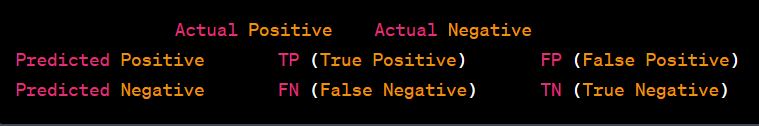

1. **True Positives (TP):** These are instances that were correctly predicted as positive by the model. In a medical diagnosis context, TP represents cases where the model correctly identified individuals with a disease.

2. **True Negatives (TN):** These are instances that were correctly predicted as negative by the model. In a spam email classification scenario, TN represents emails that were correctly identified as non-spam.

3. **False Positives (FP):** These are instances that were incorrectly predicted as positive by the model when they were actually negative. In a medical diagnosis context, FP represents cases where the model incorrectly diagnosed individuals as having a disease when they were healthy.

4. **False Negatives (FN):** These are instances that were incorrectly predicted as negative by the model when they were actually positive. In a spam email classification scenario, FN represents legitimate emails that were incorrectly classified as spam.

How to interpret these elements:

- **Accuracy:** Overall model correctness is measured as (TP + TN) / (TP + TN + FP + FN). It tells us how well the model is performing across all classes.

- **Precision:** Precision is the proportion of true positive predictions among all positive predictions made by the model and is calculated as TP / (TP + FP). It assesses the model's ability to avoid false positives.

- **Recall (Sensitivity or True Positive Rate):** Recall is the proportion of true positive predictions among all actual positive instances and is calculated as TP / (TP + FN). It assesses the model's ability to capture all positive instances.

- **Specificity (True Negative Rate):** Specificity is the proportion of true negative predictions among all actual negative instances and is calculated as TN / (TN + FP). It assesses the model's ability to avoid false alarms for the negative class.

- **F1 Score:** The F1 score is the harmonic mean of precision and recall, balancing the trade-off between false positives and false negatives. It's calculated as 2 * (Precision * Recall) / (Precision + Recall).

- **False Positives vs. False Negatives:** By comparing FP and FN, we can understand the nature of the errors our model is making. If FP is a significant concern, it means the model is prone to false alarms or Type I errors. If FN is a concern, it means the model is missing actual positive instances or Type II errors.

Interpreting a confusion matrix allow us to identify areas for model improvement. For example, if FN is a concern in a medical diagnosis model, we might focus on improving recall to capture more true positive cases. If FP is a concern in a spam filter, we might work on increasing precision to reduce false alarms. The choice between these strategies depends on the specific consequences and costs associated with each type of error in our application.

###  What are some common metrics that can be derived from a confusion matrix, and how are they calculated?

Several common performance metrics can be derived from a confusion matrix, providing valuable insights into the performance of a classification model. Here are some of the most commonly used metrics and their calculations based on a binary classification confusion matrix:

Consider the binary classification confusion matrix:

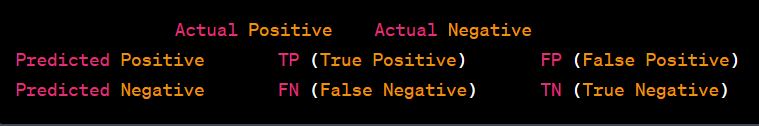

1. **Accuracy (ACC):**
   - Accuracy measures the overall correctness of predictions and is calculated as:
     
     Accuracy = (TP + TN) / (TP + TN + FP + FN)
     
2. **Precision (Positive Predictive Value, PPV):**
   - Precision measures the proportion of true positive predictions among all positive predictions made by the model and is calculated as:
     
     Precision = TP / (TP + FP)
    
3. **Recall (Sensitivity, True Positive Rate, TPR):**
   - Recall measures the proportion of true positive predictions among all actual positive instances and is calculated as:
     
     Recall = TP / (TP + FN)

4. **Specificity (True Negative Rate, TNR):**
   - Specificity measures the proportion of true negative predictions among all actual negative instances and is calculated as:
     
     Specificity = TN / (TN + FP)
     
5. **F1 Score:**
   - The F1 score is the harmonic mean of precision and recall, providing a balanced measure that considers both false positives and false negatives. It's calculated as:
     
     F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

6. **False Positive Rate (FPR):**
   - The false positive rate measures the proportion of false positive predictions among all actual negative instances and is calculated as:
     
     FPR = FP / (TN + FP)

7. **False Negative Rate (FNR):**
   - The false negative rate measures the proportion of false negative predictions among all actual positive instances and is calculated as:
     
     FNR = FN / (TP + FN)

8. **Matthews Correlation Coefficient (MCC):**
   - MCC takes into account all four elements of the confusion matrix and is particularly useful for imbalanced datasets. It's calculated as:
     
     MCC = (TP * TN - FP * FN) / sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

9. **Area Under the Receiver Operating Characteristic Curve (AUC-ROC):**
   - AUC-ROC represents the area under the ROC curve and is used to assess the model's performance across different thresholds. A higher AUC indicates better discrimination between positive and negative classes.

###  What is the relationship between the accuracy of a model and the values in its confusion matrix?

How accuracy is related to the values in the confusion matrix, using a binary classification confusion matrix:

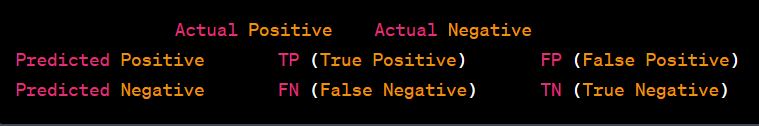

**Accuracy (ACC):**
- Accuracy measures the overall correctness of predictions made by the model.
- It is calculated as:
  
  Accuracy = (TP + TN) / (TP + TN + FP + FN)

In the context of accuracy and the confusion matrix:

- **TP (True Positives)** contribute positively to accuracy because they represent cases where the model correctly predicted the positive class.

- **TN (True Negatives)** also contribute positively to accuracy because they represent cases where the model correctly predicted the negative class.

- **FP (False Positives)** and **FN (False Negatives)** both contribute negatively to accuracy because they represent cases where the model made incorrect predictions.

Accuracy essentially measures the proportion of all predictions that are correct (both positive and negative) out of the total number of predictions. It provides a holistic view of the model's performance, but it does not distinguish between different types of errors (false positives vs. false negatives) or assess how well the model performs for specific classes. While accuracy is a useful metric for evaluating overall model performance, it may not be the best choice in cases where the class distribution is imbalanced or when different types of errors have different consequences. In such cases, it is often beneficial to complement accuracy with other performance metrics like precision, recall, F1 score, specificity, and the values from the confusion matrix to gain a more nuanced understanding of the model's behavior and its ability to correctly classify instances into different classes.

### How can you use a confusion matrix to identify potential biases or limitations in your machine learning model?

How we can use a confusion matrix to uncover some issues:

1. **Class Imbalance Detection:**
   - Check if there is a significant class imbalance in our dataset by examining the distribution of actual positive and negative instances. If one class is heavily overrepresented, it can lead to biased predictions.
   - A confusion matrix helps you visualize the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) for each class.

2. **Bias Toward Majority Class:**
   - If our model consistently predicts the majority class (negative class) while neglecting the minority class (positive class), it can indicate a bias.
   - Look for a high number of false negatives (FN) relative to true positives (TP) if the positive class is underrepresented. Conversely, a high number of false positives (FP) relative to true negatives (TN) may indicate bias toward the positive class.

3. **Threshold Sensitivity:**
   - Vary the classification threshold (the threshold for deciding which class to assign) and observe how it affects the confusion matrix. Different thresholds can lead to variations in the balance between precision and recall, which can reveal bias tendencies.
   - By adjusting the threshold, we can potentially mitigate bias and find a balance that aligns better with our objectives.

4. **Subgroup Analysis:**
   - If we suspect that bias might exist for specific subgroups within your data (e.g., based on demographic factors), create separate confusion matrices or subsets of the data to analyze performance for these subgroups.
   - Compare metrics such as precision, recall, and accuracy across different subgroups to identify disparities.

5. **Disparate Impact Analysis:**
   - In sensitive applications (e.g., hiring, lending), assess whether the model's predictions disproportionately favor or disfavor certain demographic or protected groups. Tools like the Equal Opportunity Disparity and Disparate Impact tests can be applied to measure potential bias.

6. **Bias Mitigation Techniques:**
   - If bias is identified, consider implementing bias mitigation techniques, such as re-sampling, re-weighting, or fairness-aware algorithms. These methods aim to address and reduce bias in model predictions.

7. **Feature Importance Analysis:**
   - Examine which features are contributing the most to the model's predictions, especially if you suspect that certain features might introduce bias. You can use techniques like feature importance plots or SHAP (SHapley Additive exPlanations) values to gain insights into feature contributions.

8. **Iterative Model Development:**
   - Address any identified biases or limitations iteratively by retraining the model, modifying features, or adjusting the training data to ensure fair and unbiased predictions.